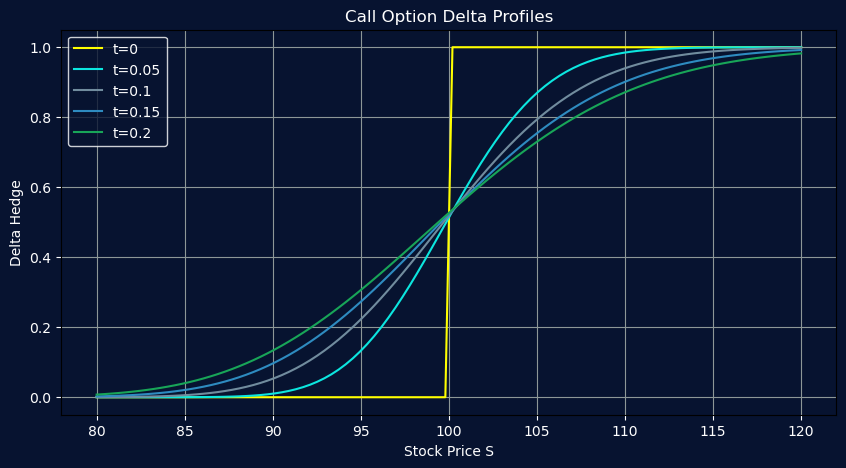

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes Delta for a Call Option

def call_option_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta
# Parameters
S = np.linspace(80, 120, 100)  # Range of stock prices
K = 100                       # Strike price
r = 0.01                      # Risk-free rate
sigma = 0.2                   # Volatility

# Time to maturity in years
time_to_maturity = [0, 0.05, 0.1, 0.15, 0.2]

fig_background_color = '#071330'  # Dark blue
plot_background_color = '#071330'  # Dark blue
text_color = 'white'
grid_color = '#8D9797'  # Light grey for visibility
line_colors = ['blue', '#0CE6DF','#718C9E', '#2E8BC0', '#18A558']

# Plotting the Delta profiles for different time to maturities
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_facecolor(plot_background_color)
plt.gcf().set_facecolor(fig_background_color)

for idx, T in enumerate(time_to_maturity):
    if T == 0:  # At expiration, delta is a step function
        delta = np.where(S >= K, 1, 0)
    else:
        delta = call_option_delta(S, K, T, r, sigma)
    plt.plot(S, delta, label=f't={T}', color=line_colors[idx % len(line_colors)])

# Set title and labels with the specified text color
plt.title('Call Option Delta Profiles', color=text_color)
plt.xlabel('Stock Price S', color=text_color)
plt.ylabel('Delta Hedge', color=text_color)

# Set the tick colors to be visible
ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)

# Set grid with specified color and make it visible against the dark background
plt.grid(True, color=grid_color)

# Modify the legend to have white text and a matching background color
legend = plt.legend(facecolor=plot_background_color, edgecolor=text_color)
for text in legend.get_texts():
    text.set_color(text_color)

# Show the plot
plt.show()
